# 1. Introdução

# 2. Configurações

## 2.1. Importações

In [1]:
import os
import json
import math

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import altair as alt

import networkx as nx

## 2.2. Carregamento dos dados

In [2]:
!rm -rf data/*

In [3]:
!wget -O ./data/MC2.zip https://github.com/vast-challenge/2023-data/raw/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip

--2023-12-01 17:09:53--  https://github.com/vast-challenge/2023-data/raw/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vast-challenge/2023-data/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip [following]
--2023-12-01 17:09:54--  https://raw.githubusercontent.com/vast-challenge/2023-data/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59914171 (57M) [application/zip]
Saving to: ‘./data/MC2.zip’

./data/MC2.zip      100%[===================>]  57,14M  6,51MB/s    in 8,4s    

2023-12-01 17:10:03 

In [4]:
!unzip ./data/MC2.zip -d ./data/
!rm -rf ./data/MC2.zip

Archive:  ./data/MC2.zip
   creating: ./data/MC2/
   creating: ./data/MC2/bundles/
  inflating: ./data/MC2/bundles/carp.json  
  inflating: ./data/MC2/bundles/catfish.json  
  inflating: ./data/MC2/bundles/chub_mackerel.json  
  inflating: ./data/MC2/bundles/cod2.json  
  inflating: ./data/MC2/bundles/herring.json  
  inflating: ./data/MC2/bundles/lichen.json  
  inflating: ./data/MC2/bundles/mackerel.json  
  inflating: ./data/MC2/bundles/pollock.json  
  inflating: ./data/MC2/bundles/salmon.json  
  inflating: ./data/MC2/bundles/salmon_wgl.json  
  inflating: ./data/MC2/bundles/shark.json  
  inflating: ./data/MC2/bundles/tuna.json  
  inflating: ./data/MC2/mc2_challenge_graph.zip  
  inflating: ./data/MC2/VAST 2023 Data Notes.pdf  
  inflating: ./data/MC2/VAST Challenge 2023 C2 Answer Sheet.htm  
   creating: ./data/MC2/VAST Challenge 2023 C2 Answer Sheet_files/
  inflating: ./data/MC2/VAST Challenge 2023 C2 Answer Sheet_files/colorschememapping.xml  
  inflating: ./data/MC2/VAST Ch

In [5]:
!unzip ./data/MC2/mc2_challenge_graph.zip -d ./data/MC2/
!rm -rf ./data/MC2/mc2_challenge_graph.zip

Archive:  ./data/MC2/mc2_challenge_graph.zip
  inflating: ./data/MC2/mc2_challenge_graph.json  
  inflating: ./data/MC2/__MACOSX/._mc2_challenge_graph.json  


### 2.2.1. Graph

In [6]:
with open("./data/MC2/mc2_challenge_graph.json", "r") as f:
    graph_data = json.load(f)

In [7]:
df_graph_nodes = pd.DataFrame(graph_data["nodes"])
df_graph_nodes

,shpcountry,rcvcountry,dataset,id
0,Polarinda,Oceanus,MC2,AquaDelight Inc and Son's
1,NaN,NaN,MC2,BaringoAmerica Marine Ges.m.b.H.
2,Oceanus,Oceanus,MC2,Yu gan Sea spray GmbH Industrial
3,NaN,NaN,MC2,FlounderLeska Marine BV
4,Oceanus,Oceanus,MC2,Olas del Mar Worldwide
...,...,...,...,...
34571,NaN,Oceanus,MC2,-4635
34572,NaN,Oceanus,MC2,-2722
34573,NaN,Oceanus,MC2,-17910
34574,NaN,Oceanus,MC2,-19206


In [8]:
df_graph_links = pd.DataFrame(graph_data["links"])
df_graph_links["arrivaldate"] = pd.to_datetime(df_graph_links["arrivaldate"], format="%Y-%m-%d")
df_graph_links

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,dataset,source,target,valueofgoodsusd
0,2034-02-12,630630,141015.0,0.0,4780,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN
1,2034-03-13,630630,141015.0,0.0,6125,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN
2,2028-02-07,470710,NaN,0.0,10855,MC2,AquaDelight Inc and Son's,-15045,NaN
3,2028-02-23,470710,NaN,0.0,11250,MC2,AquaDelight Inc and Son's,-15045,NaN
4,2028-09-11,470710,NaN,0.0,11165,MC2,AquaDelight Inc and Son's,-15045,NaN
...,...,...,...,...,...,...,...,...,...
5464373,2034-12-25,304740,NaN,0.0,945,MC2,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee,3005.0
5464374,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN
5464375,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN
5464376,2034-12-28,160414,NaN,0.0,6710,MC2,Costa del Mar NV,Selous Game Reserve Kga,50505.0


### 2.2.2. Bundles

In [9]:
bundles = {}

In [10]:
for dirpath, dnames, fnames in os.walk("./data/MC2/bundles/"):
    for filename in fnames:
        print(filename)
        with open(f"./data/MC2/bundles/{filename}", "r") as f:
            bundles[filename.split('.')[0]] = json.load(f)

chub_mackerel.json
lichen.json
pollock.json
mackerel.json
cod2.json
carp.json
salmon.json
tuna.json
catfish.json
shark.json
herring.json
salmon_wgl.json


In [11]:
df_bundles_links = pd.concat([pd.DataFrame(bundle_data["links"]) for bundle_data in bundles.values()], axis=0)
df_bundles_links["arrivaldate"] = pd.to_datetime(df_bundles_links["arrivaldate"], format="%Y-%m-%d")
df_bundles_links

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,generated_by,dataset,source,target
0,2034-06-06,160414,119085.0,0.0,24030.0,chub_mackerel,MC2,Ocean Quest A/S Logistics,Estrella del Mar Tilapia Oyj Marine
1,2034-06-06,160414,119085.0,0.0,24030.0,chub_mackerel,MC2,Ocean Quest A/S Logistics,Estrella del Mar Tilapia Oyj Marine
2,2034-06-06,160414,119110.0,0.0,24020.0,chub_mackerel,MC2,Ocean Quest A/S Logistics,Estrella del Mar Tilapia Oyj Marine
3,2034-06-06,160414,119085.0,0.0,24030.0,chub_mackerel,MC2,Ocean Quest A/S Logistics,Estrella del Mar Tilapia Oyj Marine
4,2034-06-06,160414,119110.0,0.0,24035.0,chub_mackerel,MC2,Ocean Quest A/S Logistics,Estrella del Mar Tilapia Oyj Marine
...,...,...,...,...,...,...,...,...,...
211,2034-12-09,30461,50105.0,0.0,23315.0,salmon_wgl,MC2,Manipur Market Ltd. Liability Co,Olas del Sur Ltd
212,2034-12-03,940161,NaN,0.0,5185.0,salmon_wgl,MC2,Jammu Ltd. Liability Co,Costa de la Felicidad Shipping
213,2034-09-25,80119,19505.0,0.0,19145.0,salmon_wgl,MC2,Irish Trout Inc Solutions,hǎi dǎn Corporation Wharf
214,2034-12-06,846591,NaN,5.0,24600.0,salmon_wgl,MC2,Selous Game Reserve Sp Distribution,Costa de la Felicidad Shipping


In [12]:
dfs_bundles = []

for key, bundle_data in bundles.items():
    df_bundle = pd.DataFrame(bundle_data["nodes"])
    df_bundle["generated_by"] = [key for _ in range(len(df_bundle))]
    dfs_bundles.append(df_bundle)

df_bundles_nodes = pd.concat(dfs_bundles, axis=0)
df_bundles_nodes

,shpcountry,dataset,id,rcvcountry,generated_by
0,Vesperanda,MC2,Ocean Quest A/S Logistics,NaN,chub_mackerel
1,NaN,MC2,Estrella del Mar Tilapia Oyj Marine,Coralmarica,chub_mackerel
2,NaN,MC2,-28,Oceanus,chub_mackerel
3,NaN,MC2,Volga River LLC Enterprises,Azurionix,chub_mackerel
4,NaN,MC2,Uttarakhand Market Limited Liability Company ...,Azurionix,chub_mackerel
...,...,...,...,...,...
115,Mawazam,MC2,Irish Trout Inc Solutions,NaN,salmon_wgl
116,Alverossia,MC2,Selous Game Reserve Sp Distribution,NaN,salmon_wgl
117,NaN,MC2,Uttarakhand Market Limited Liability Company ...,Azurionix,salmon_wgl
118,Marebak,MC2,SRL Ltd. Liability Co,NaN,salmon_wgl


# 3. Análise exploratória dos dados

In [13]:
df_value = df_graph_links[["arrivaldate", "valueofgoodsusd"]]
df_value = df_value.loc[df_value["valueofgoodsusd"].notna()]
df_value

,arrivaldate,valueofgoodsusd
6,2028-04-12,87110.0
7,2028-06-04,188140.0
9,2028-09-08,221110.0
10,2029-02-04,58645.0
11,2029-02-04,58645.0
...,...,...
5464366,2034-12-13,296285.0
5464372,2034-12-25,3000.0
5464373,2034-12-25,3005.0
5464376,2034-12-28,50505.0


In [14]:
# px.violin(
#     x=df_value["arrivaldate"],
#     y=df_value["valueofgoodsusd"]
# )

In [15]:
# px.scatter(
#     x=df_value["arrivaldate"],
#     y=df_value["valueofgoodsusd"]
# )

## 3.1. Tratamento de outliers

In [16]:
def getoutliersvalue(xs, df):
  outliers = []
  if xs in df.columns:
    ql = df[xs].quantile([.25])
    qh = df[xs].quantile([.75])
    amplitude = int(qh) - int(ql)
    moderateout = int(qh) + (amplitude*1.5)
    extremeout = int(qh) + (amplitude*3.0)
    outliers.append(moderateout)
    outliers.append(extremeout)
    return outliers

In [17]:
weight_outliers = getoutliersvalue('weightkg', df_graph_links)
weight_outliers

/tmp/ipykernel_240358/534003755.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  amplitude = int(qh) - int(ql)
/tmp/ipykernel_240358/534003755.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  moderateout = int(qh) + (amplitude*1.5)
/tmp/ipykernel_240358/534003755.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  extremeout = int(qh) + (amplitude*3.0)


[44735.0, 69740.0]

In [18]:
df_graph_links["weight_outliers"] = df_graph_links["weightkg"].map(
    lambda x: "extreme" if x > weight_outliers[1] else "moderate" if (x > weight_outliers[0]) and (x < weight_outliers[1]) else "normal"
)

df_graph_links

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,dataset,source,target,valueofgoodsusd,weight_outliers
0,2034-02-12,630630,141015.0,0.0,4780,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN,normal
1,2034-03-13,630630,141015.0,0.0,6125,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN,normal
2,2028-02-07,470710,NaN,0.0,10855,MC2,AquaDelight Inc and Son's,-15045,NaN,normal
3,2028-02-23,470710,NaN,0.0,11250,MC2,AquaDelight Inc and Son's,-15045,NaN,normal
4,2028-09-11,470710,NaN,0.0,11165,MC2,AquaDelight Inc and Son's,-15045,NaN,normal
...,...,...,...,...,...,...,...,...,...,...
5464373,2034-12-25,304740,NaN,0.0,945,MC2,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee,3005.0,normal
5464374,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN,normal
5464375,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN,normal
5464376,2034-12-28,160414,NaN,0.0,6710,MC2,Costa del Mar NV,Selous Game Reserve Kga,50505.0,normal


In [19]:
usd_outliers = getoutliersvalue('valueofgoodsusd', df_graph_links)
usd_outliers

/tmp/ipykernel_240358/534003755.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  amplitude = int(qh) - int(ql)
/tmp/ipykernel_240358/534003755.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  moderateout = int(qh) + (amplitude*1.5)
/tmp/ipykernel_240358/534003755.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  extremeout = int(qh) + (amplitude*3.0)


[354852.5, 551675.0]

In [20]:
df_graph_links["usd_outliers"] = df_graph_links["valueofgoodsusd"].map(
    lambda x: "extreme" if x > usd_outliers[1] else "moderate" if (x > usd_outliers[0]) and (x < usd_outliers[1]) else "normal"
)

df_graph_links

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,dataset,source,target,valueofgoodsusd,weight_outliers,usd_outliers
0,2034-02-12,630630,141015.0,0.0,4780,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN,normal,normal
1,2034-03-13,630630,141015.0,0.0,6125,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN,normal,normal
2,2028-02-07,470710,NaN,0.0,10855,MC2,AquaDelight Inc and Son's,-15045,NaN,normal,normal
3,2028-02-23,470710,NaN,0.0,11250,MC2,AquaDelight Inc and Son's,-15045,NaN,normal,normal
4,2028-09-11,470710,NaN,0.0,11165,MC2,AquaDelight Inc and Son's,-15045,NaN,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...
5464373,2034-12-25,304740,NaN,0.0,945,MC2,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee,3005.0,normal,normal
5464374,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN,normal,normal
5464375,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN,normal,normal
5464376,2034-12-28,160414,NaN,0.0,6710,MC2,Costa del Mar NV,Selous Game Reserve Kga,50505.0,normal,normal


In [21]:
count_outliers = pd.DataFrame(
    [df_graph_links.iloc[:, -2].value_counts(),
     df_graph_links.iloc[:, -1].value_counts()], index=["weight_outliers", "usd_outliers"]
)

count_outliers

,normal,extreme,moderate
weight_outliers,5092861,231515,140002
usd_outliers,5275762,109777,78839


In [31]:
fig = px.imshow(
    count_outliers.iloc[:, -2:],
    color_continuous_scale="Emrld"
)
fig.show()

## 3.2. Análise de correlações

In [23]:
df_graph_links[["valueofgoods_omu", "volumeteu", "weightkg", "valueofgoodsusd"]]

,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
0,141015.0,0.0,4780,NaN
1,141015.0,0.0,6125,NaN
2,NaN,0.0,10855,NaN
3,NaN,0.0,11250,NaN
4,NaN,0.0,11165,NaN
...,...,...,...,...
5464373,NaN,0.0,945,3005.0
5464374,NaN,0.0,2170,NaN
5464375,NaN,0.0,2170,NaN
5464376,NaN,0.0,6710,50505.0


In [24]:
df_graph_links[["valueofgoods_omu", "volumeteu", "weightkg", "valueofgoodsusd"]].corr(method="pearson")

,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
valueofgoods_omu,1.000000,0.207118,0.004395,NaN
volumeteu,0.207118,1.000000,0.290822,0.009855
weightkg,0.004395,0.290822,1.000000,0.018498
valueofgoodsusd,NaN,0.009855,0.018498,1.000000


In [25]:
df_graph_links[["valueofgoods_omu", "volumeteu", "weightkg", "valueofgoodsusd"]].corr(method="kendall")

,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
valueofgoods_omu,1.000000,0.255698,0.299549,NaN
volumeteu,0.255698,1.000000,0.373300,0.283400
weightkg,0.299549,0.373300,1.000000,0.460443
valueofgoodsusd,NaN,0.283400,0.460443,1.000000


In [26]:
df_graph_links[["valueofgoods_omu", "volumeteu", "weightkg", "valueofgoodsusd"]].corr(method="spearman")

,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
valueofgoods_omu,1.000000,0.396172,0.454619,NaN
volumeteu,0.396172,1.000000,0.458540,0.348004
weightkg,0.454619,0.458540,1.000000,0.624436
valueofgoodsusd,NaN,0.348004,0.624436,1.000000


array([[<Axes: xlabel='volumeteu', ylabel='volumeteu'>,
        <Axes: xlabel='weightkg', ylabel='volumeteu'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='volumeteu'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='volumeteu'>],
       [<Axes: xlabel='volumeteu', ylabel='weightkg'>,
        <Axes: xlabel='weightkg', ylabel='weightkg'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='weightkg'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='weightkg'>],
       [<Axes: xlabel='volumeteu', ylabel='valueofgoods_omu'>,
        <Axes: xlabel='weightkg', ylabel='valueofgoods_omu'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='valueofgoods_omu'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='valueofgoods_omu'>],
       [<Axes: xlabel='volumeteu', ylabel='valueofgoodsusd'>,
        <Axes: xlabel='weightkg', ylabel='valueofgoodsusd'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='valueofgoodsusd'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='valueofgoodsusd'>]],
   

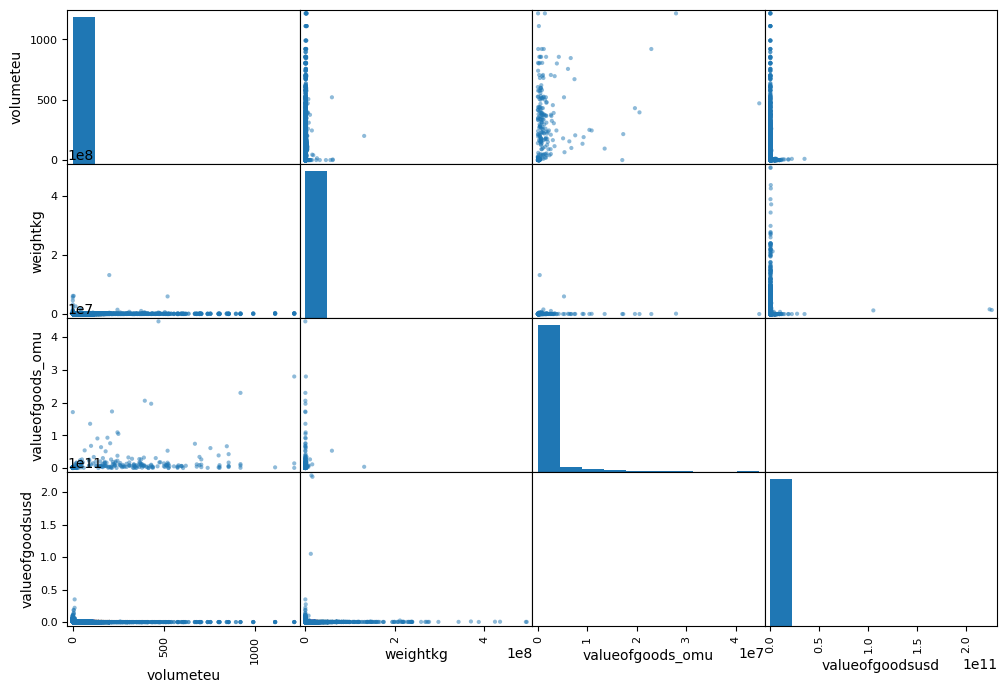

In [27]:
pd.plotting.scatter_matrix(
    df_graph_links[["volumeteu", "weightkg", "valueofgoods_omu", "valueofgoodsusd"]],
    figsize=(12, 8)
)

### Análise de regressão

# 4. Descoberta de padrões

In [28]:
def plot_network(node_link_data: dict, title: str, ax: plt.axis = None):
    
    nx.draw_networkx(graph, ax=ax)

    if not ax:
        ax = plt.gca()
    

    ax.margins(0.20)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [29]:
num_subplots = len(bundles)
num_horizontal = math.ceil(math.sqrt(num_subplots))
num_horizontal

4

/tmp/ipykernel_240358/3911968025.py:41: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



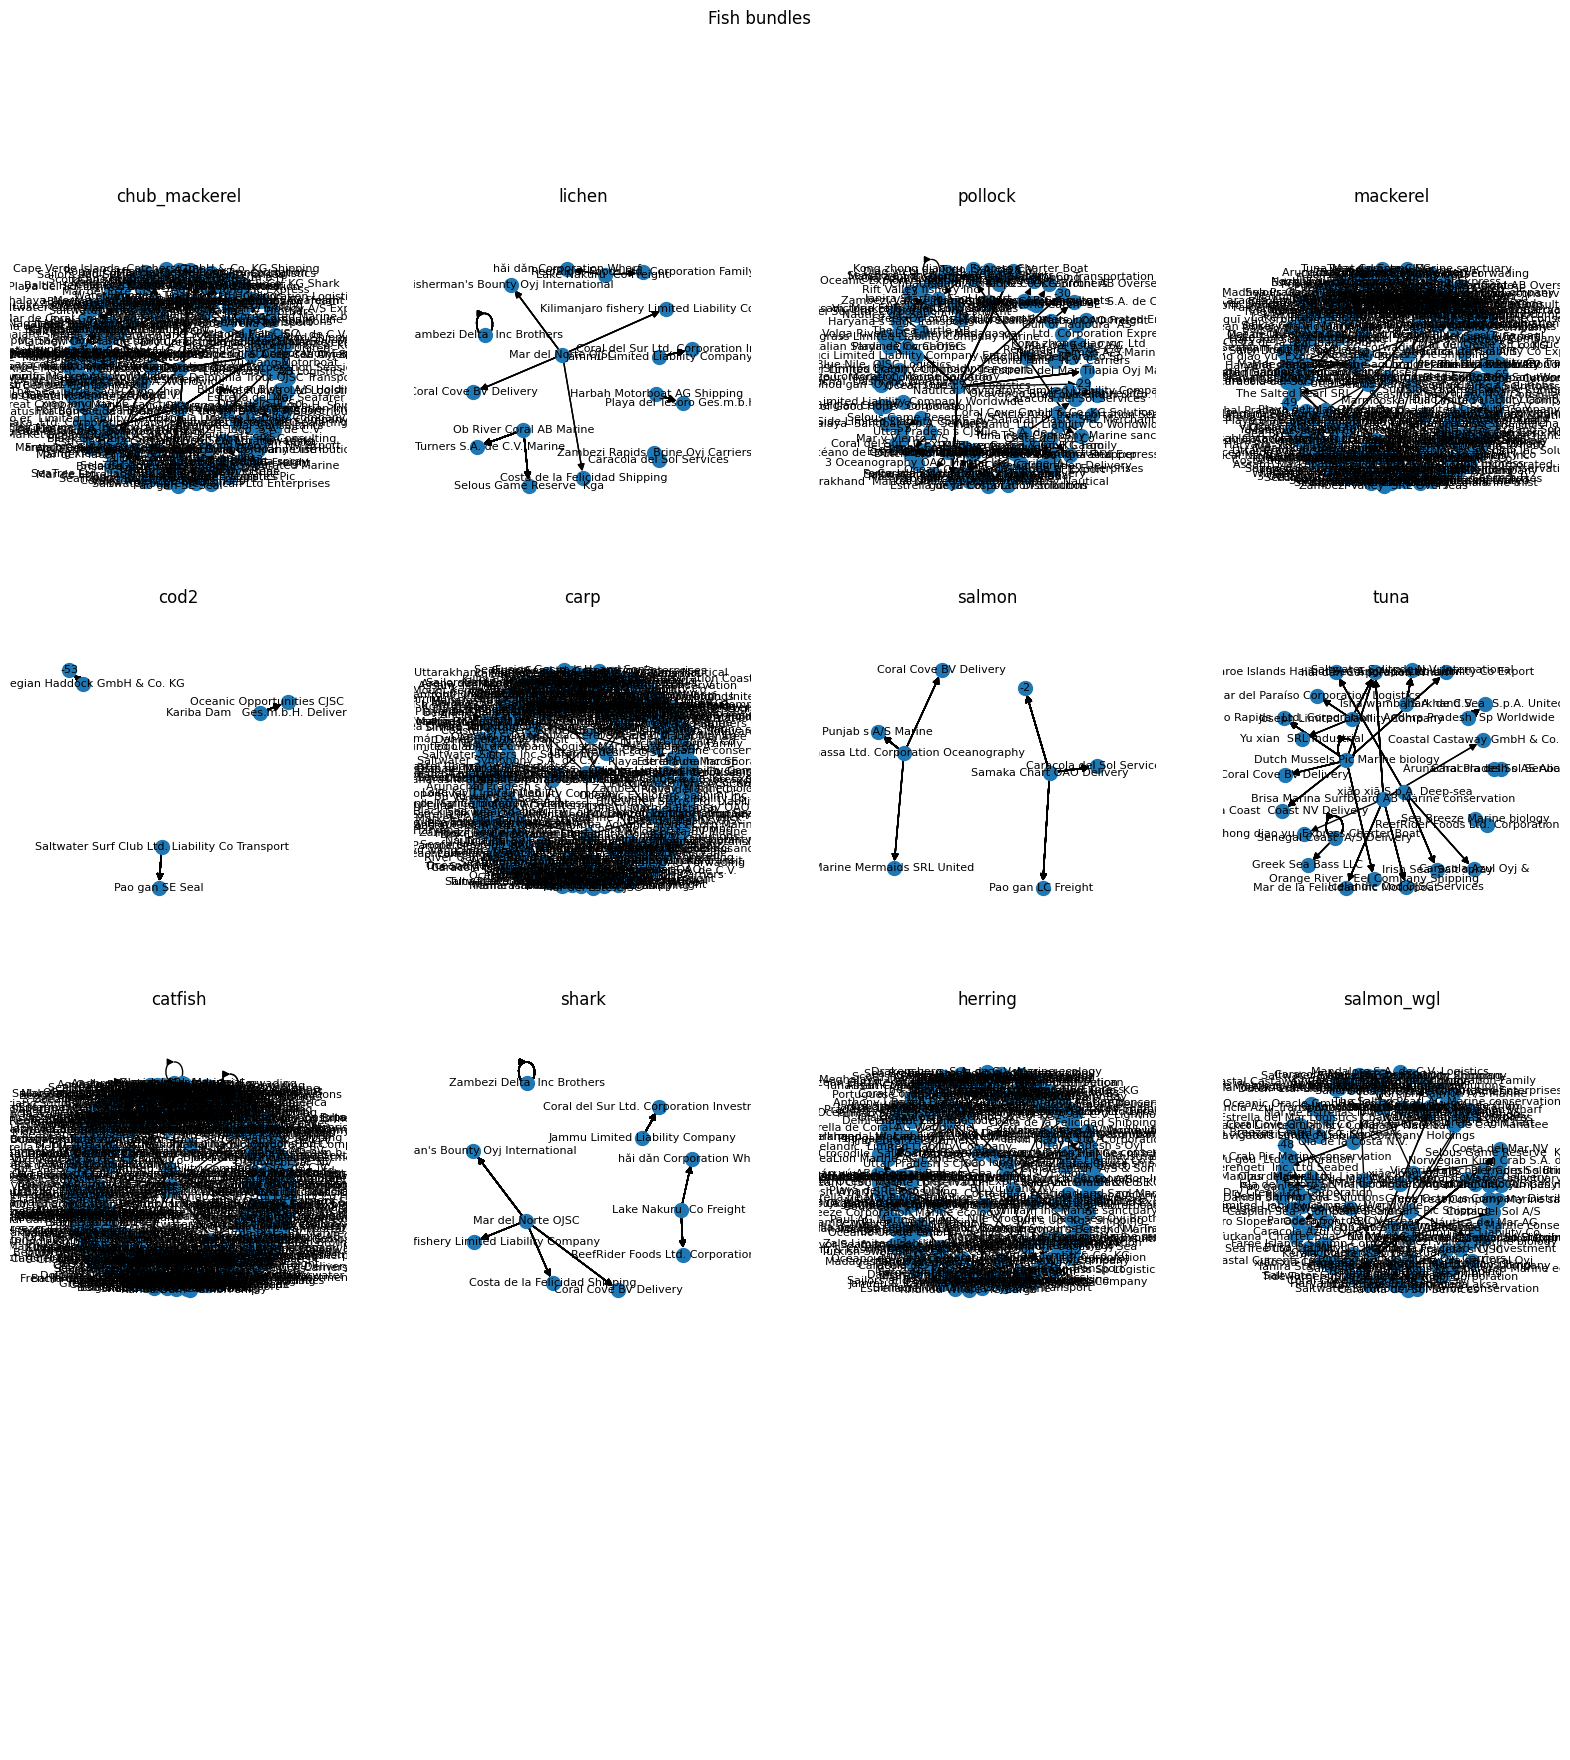

In [30]:
# create a square subplot graph
fig, axs = plt.subplots(num_horizontal, num_horizontal, figsize=(20, 20))
fig.suptitle("Fish bundles")

# iterators for row and column
row = col = 0

# for each bundle, plot in the corresponding row and column
for i, (key, value) in enumerate(bundles.items()):

    graph = nx.node_link_graph(value)
    nx.draw_networkx(
        G=graph,
        node_size=100,
        font_size=8,
        ax=axs[row, col]
    )

    axs[row, col].set_title(key)
    axs[row, col].margins(0.2)
    axs[row, col].axis("off")

    col += 1

    if col == num_horizontal:
        row += 1
        col = 0

# disable the remaining axis
i += 1
while i < num_horizontal**2:
    axs[row, col].axis("off")

    i += 1
    col += 1

    if col == num_horizontal:
        row += 1
        col = 0

fig.show()